In [3]:
from fastai.vision.all import *

In [4]:
from fastai.medical.imaging import *

In [5]:
path = Path('./data')

In [6]:
Path.BASE_PATH = path

In [7]:
path.ls()

(#6) [Path('train'),Path('sample_submission.csv'),Path('test.csv'),Path('test'),Path('train.csv'),Path('.ipynb_checkpoints')]

In [8]:
files = get_dicom_files(path, folders='train')

In [12]:
dcm = Path.dcmread(files[1])

In [22]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.126819103927320311061084987976255322281
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0018) SOP Instance UID                    UI: 2.25.126819103927320311061084987976255322281
(0008, 0060) Modality                            CS: '

1 frame per file
1 frame per file
1 frame per file
1 frame per file
1 frame per file


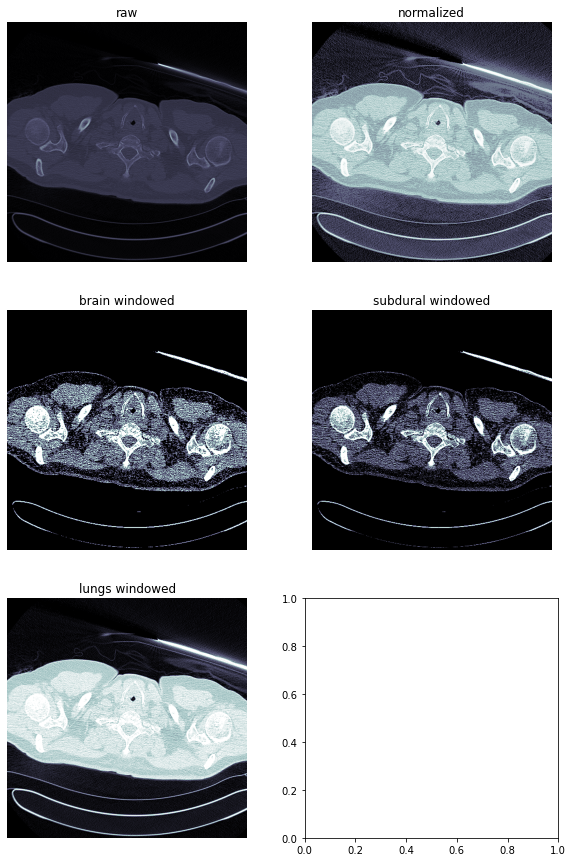

In [21]:
scales = False, True, dicom_windows.brain, dicom_windows.subdural, dicom_windows.lungs
titles = 'raw','normalized','brain windowed','subdural windowed', 'lungs windowed'
for s,a,t in zip(scales, subplots(3,2,imsize=5)[1].flat, titles):
    dcm.show(scale=s, ax=a, title=t)

1 frame per file


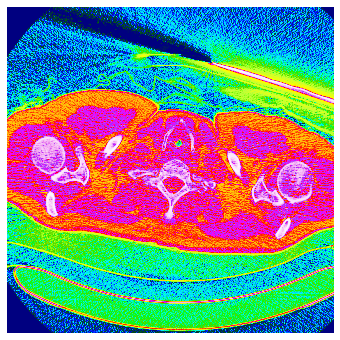

In [16]:
dcm.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

1 frame per file


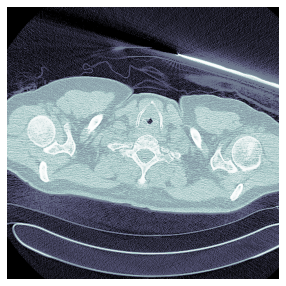

In [17]:
dcm.show()

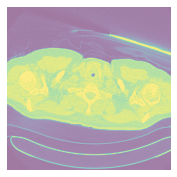

In [25]:
mask = dcm.mask_from_blur(dicom_windows.lungs)
wind = dcm.windowed(*dicom_windows.lungs)

_,ax = subplots(1,1)
show_image(wind, ax=ax[0])
show_image(mask, alpha=0.5, cmap=plt.cm.Reds, ax=ax[0]);

In [34]:
px = dcm.scaled_px.flatten()
plt.hist(px, bins=40)

In [36]:
bins = px.freqhist_bins(20)
print(bins)
plt.hist(px, bins=bins);

tensor([-1024., -1022., -1004.,  -984.,  -964.,  -944.,  -921.,  -895.,  -862.,
         -797.,  -493.,  -197.,  -120.,   -64.,   -12.,    40.,    99.,   182.,
          414.,  1465.])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fabc0765950> (for post_execute):


KeyboardInterrupt: 

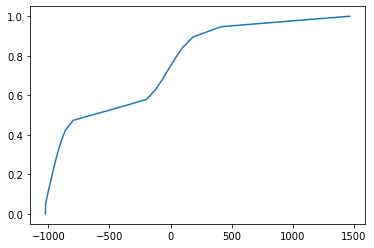

In [37]:
plt.plot(bins, torch.linspace(0,1,len(bins)));

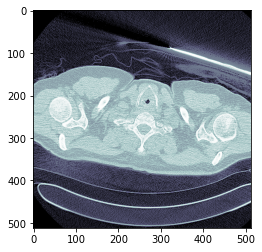

In [38]:
plt.imshow(dcm.hist_scaled(), cmap=plt.cm.bone);

1 frame per file


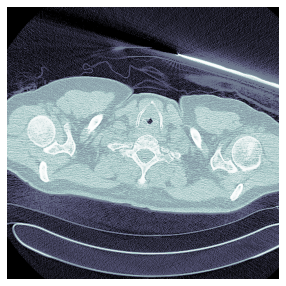

In [39]:
dcm.show()

1 frame per file


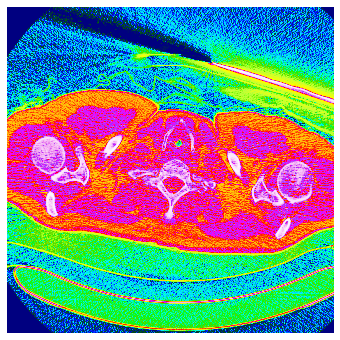

In [40]:
dcm.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

In [72]:
# ID00073637202198167792918
x = files[0:354]

In [73]:
x[21].dcmread()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.109131341870150087550046271178045003931
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0018) SOP Instance UID                    UI: 2.25.109131341870150087550046271178045003931
(0008, 0060) Modality                            CS: '